In [1]:
import numpy as np
import matplotlib.pyplot as plt
import slugger as slug
import pandas as pd
import matplotlib.ticker as ticker

from matplotlib.colors import LogNorm

params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
class hyperparams:

    def __init__(self, filename):
        self.df = pd.read_csv(filename, index_col=0)
        self.vals = self.df.values
        self.ell = self.get_ellList(self.df)
        self.sigma = self.get_sigList(self.df)
        
    def get_ellList(self, df):
        ell = []
        for idx in df.index:
            ell.append(idx)
        return np.array(ell)
        
    def get_sigList(self, df):
        sigma = []
        for col in df.columns:
            sigma.append(np.float64(col))
        return np.array(sigma)
        
    def edge_grid(self):
    # assume that both ell & sigma
    # are equispaced
        dl = self.ell[1] - self.ell[0]
        ds = self.sigma[1] - self.sigma[0]
        
        ll = self.ell - dl/2.
        ss = self.sigma - ds/2.
        
        li = np.append(ll, ll[-1]+dl)
        si = np.append(ss, ss[-1]+ds)
        
        return li, si

In [3]:
sf3 = hyperparams('./gpWENO5_SF3.csv')
sf4 = hyperparams('./gpWENO5_SF4.csv')
rk3 = hyperparams('./gpWENO5_RK3.csv')

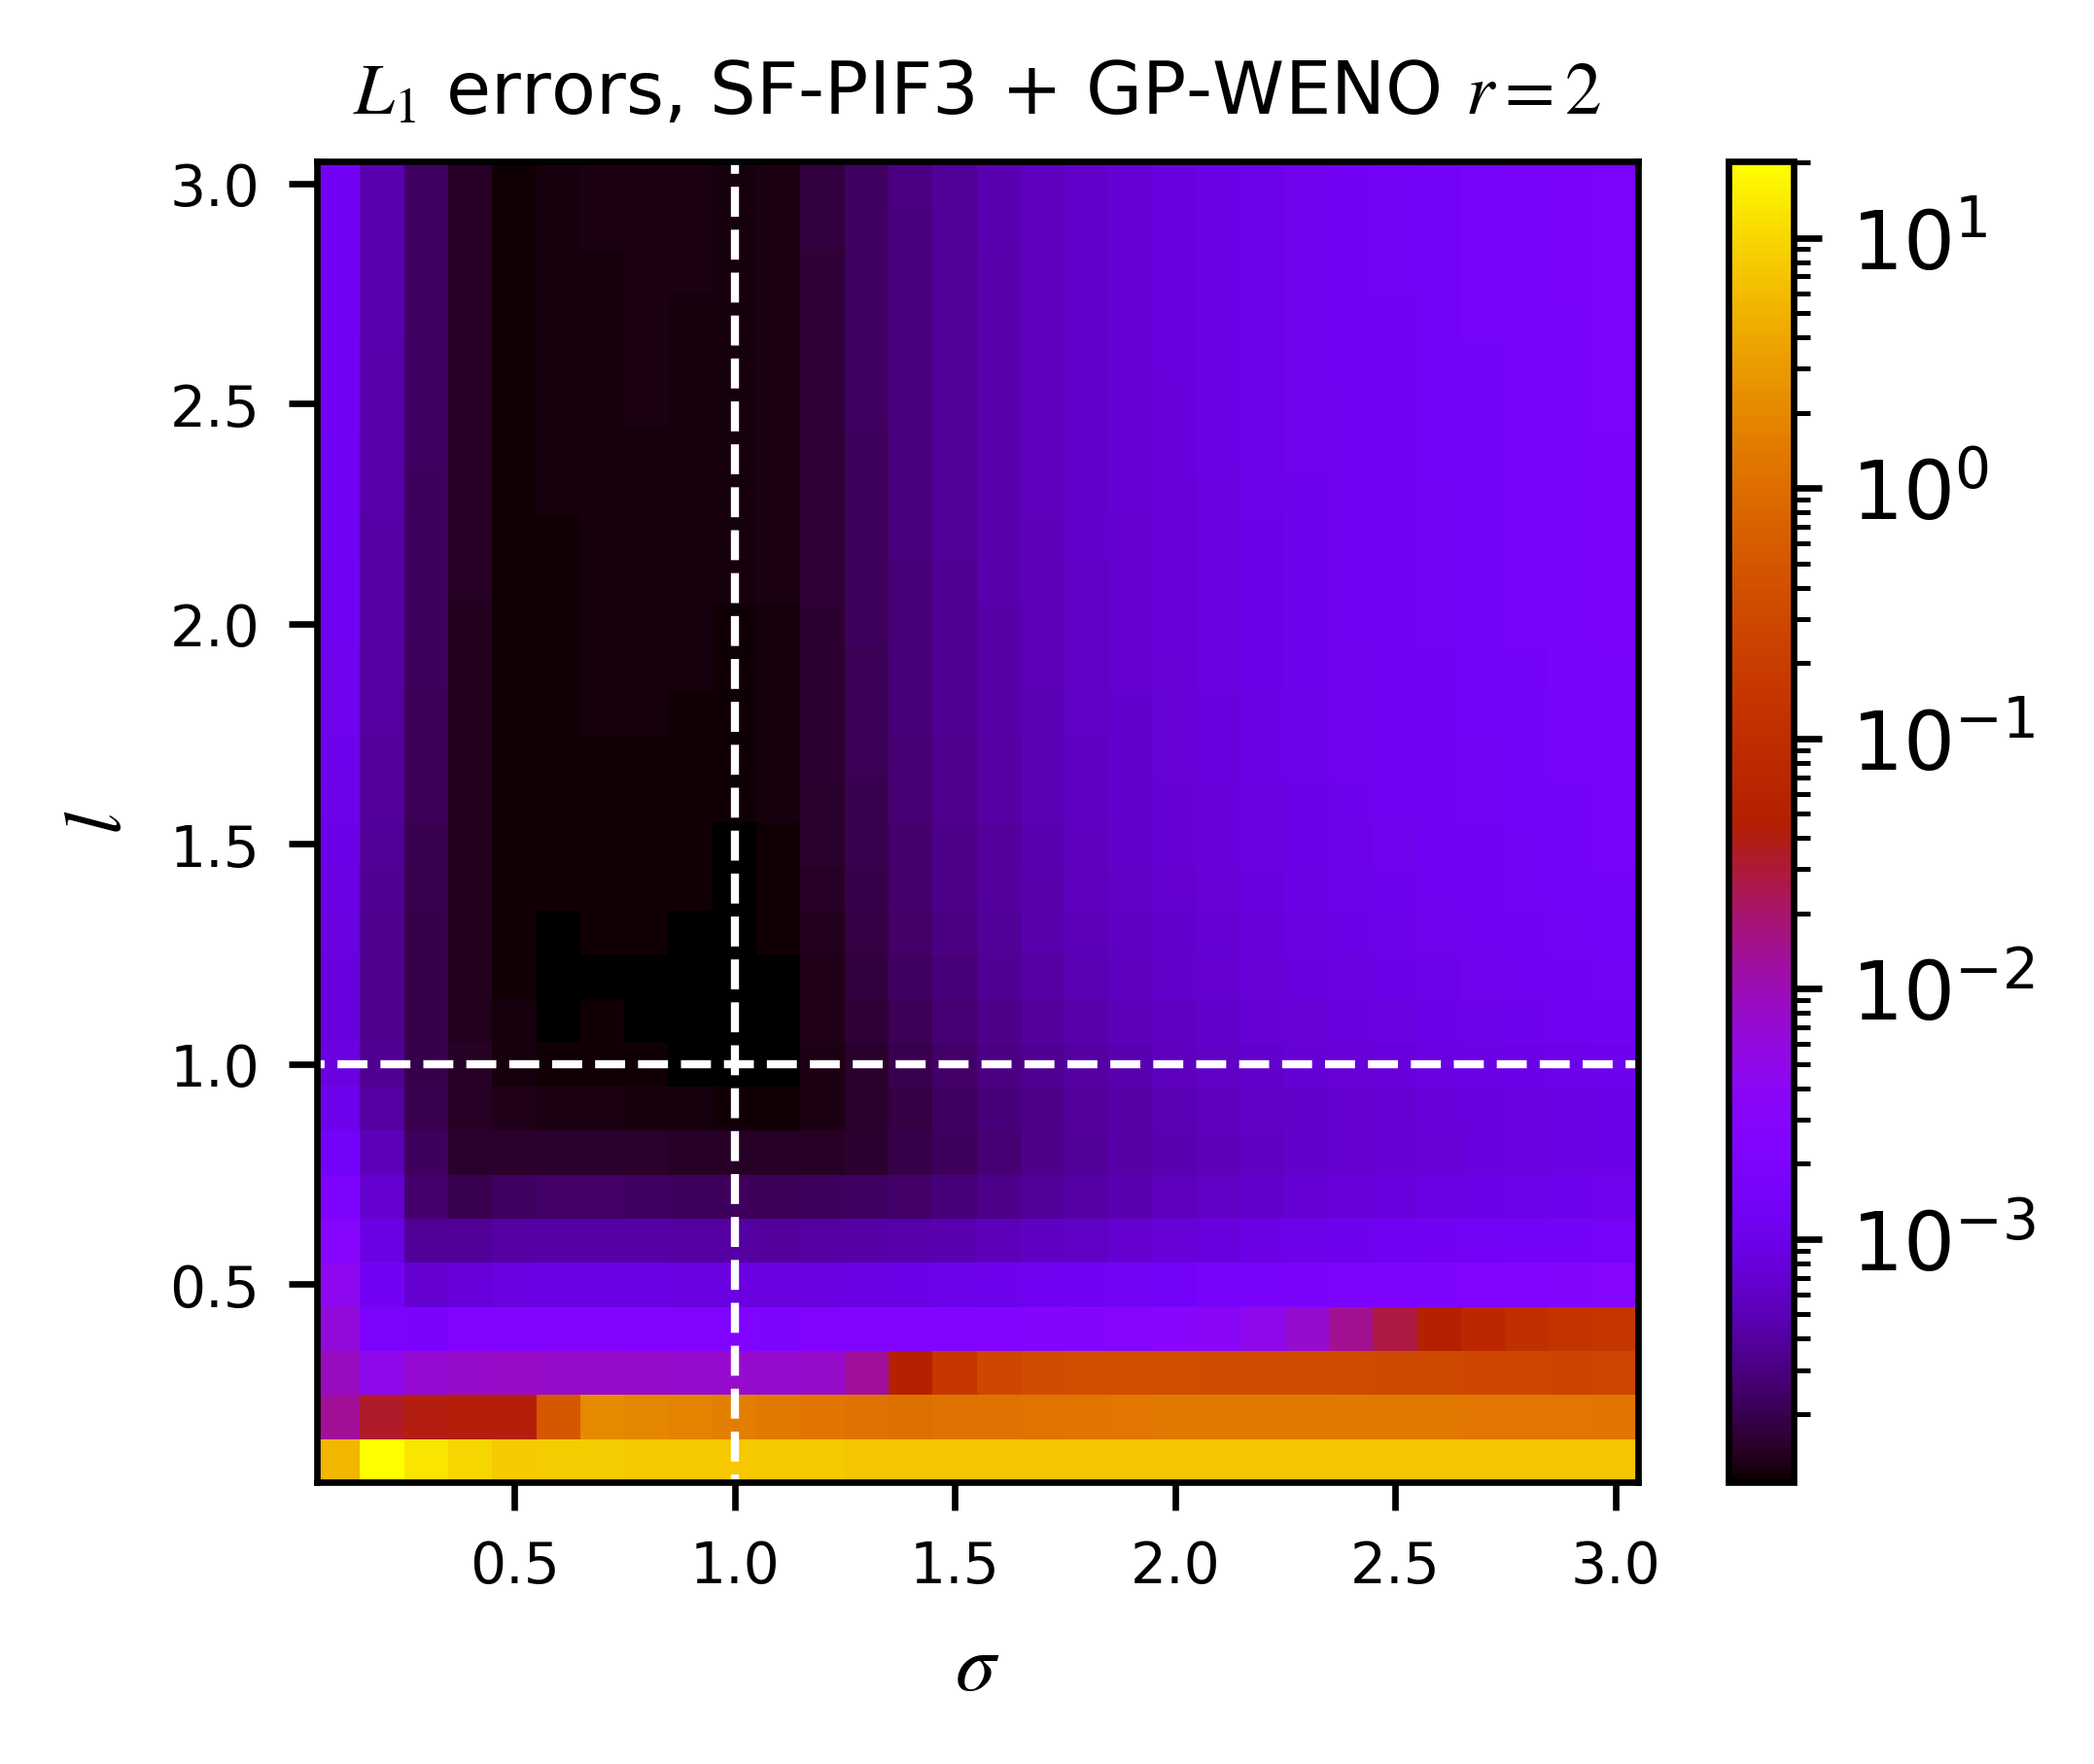

In [10]:
data = sf3

fig = plt.figure(figsize=(4,3), dpi=600)
ax = fig.add_subplot(1,1,1)

ll, ss = data.edge_grid()

im = ax.pcolormesh(ss, ll, data.vals, cmap='gnuplot', norm=LogNorm(data.vals.min(), data.vals.max()))


ax.set_aspect(aspect=1)
ax.set_xlim(0.05, 3.05)
ax.set_ylim(0.05, 3.05)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$l$')


ax.tick_params(axis='both', which='major', labelsize=7)

# ax.set_xticks(data.sigma)
# ax.set_yticks(data.ell)

ax.set_title('$L_{1}$ errors, SF-PIF3 + GP-WENO $r=2$', fontsize=9)

ax.hlines(1.0, 0.0, 3.1, linestyle='--', color='w', linewidth=1)
ax.vlines(1.0, 0.0, 3.1, linestyle='--', color='w', linewidth=1)



cb = plt.colorbar(im)

fig.savefig('./hp_cmap_gp2_sf3.png', bbox_inches='tight', pad_inches=0)

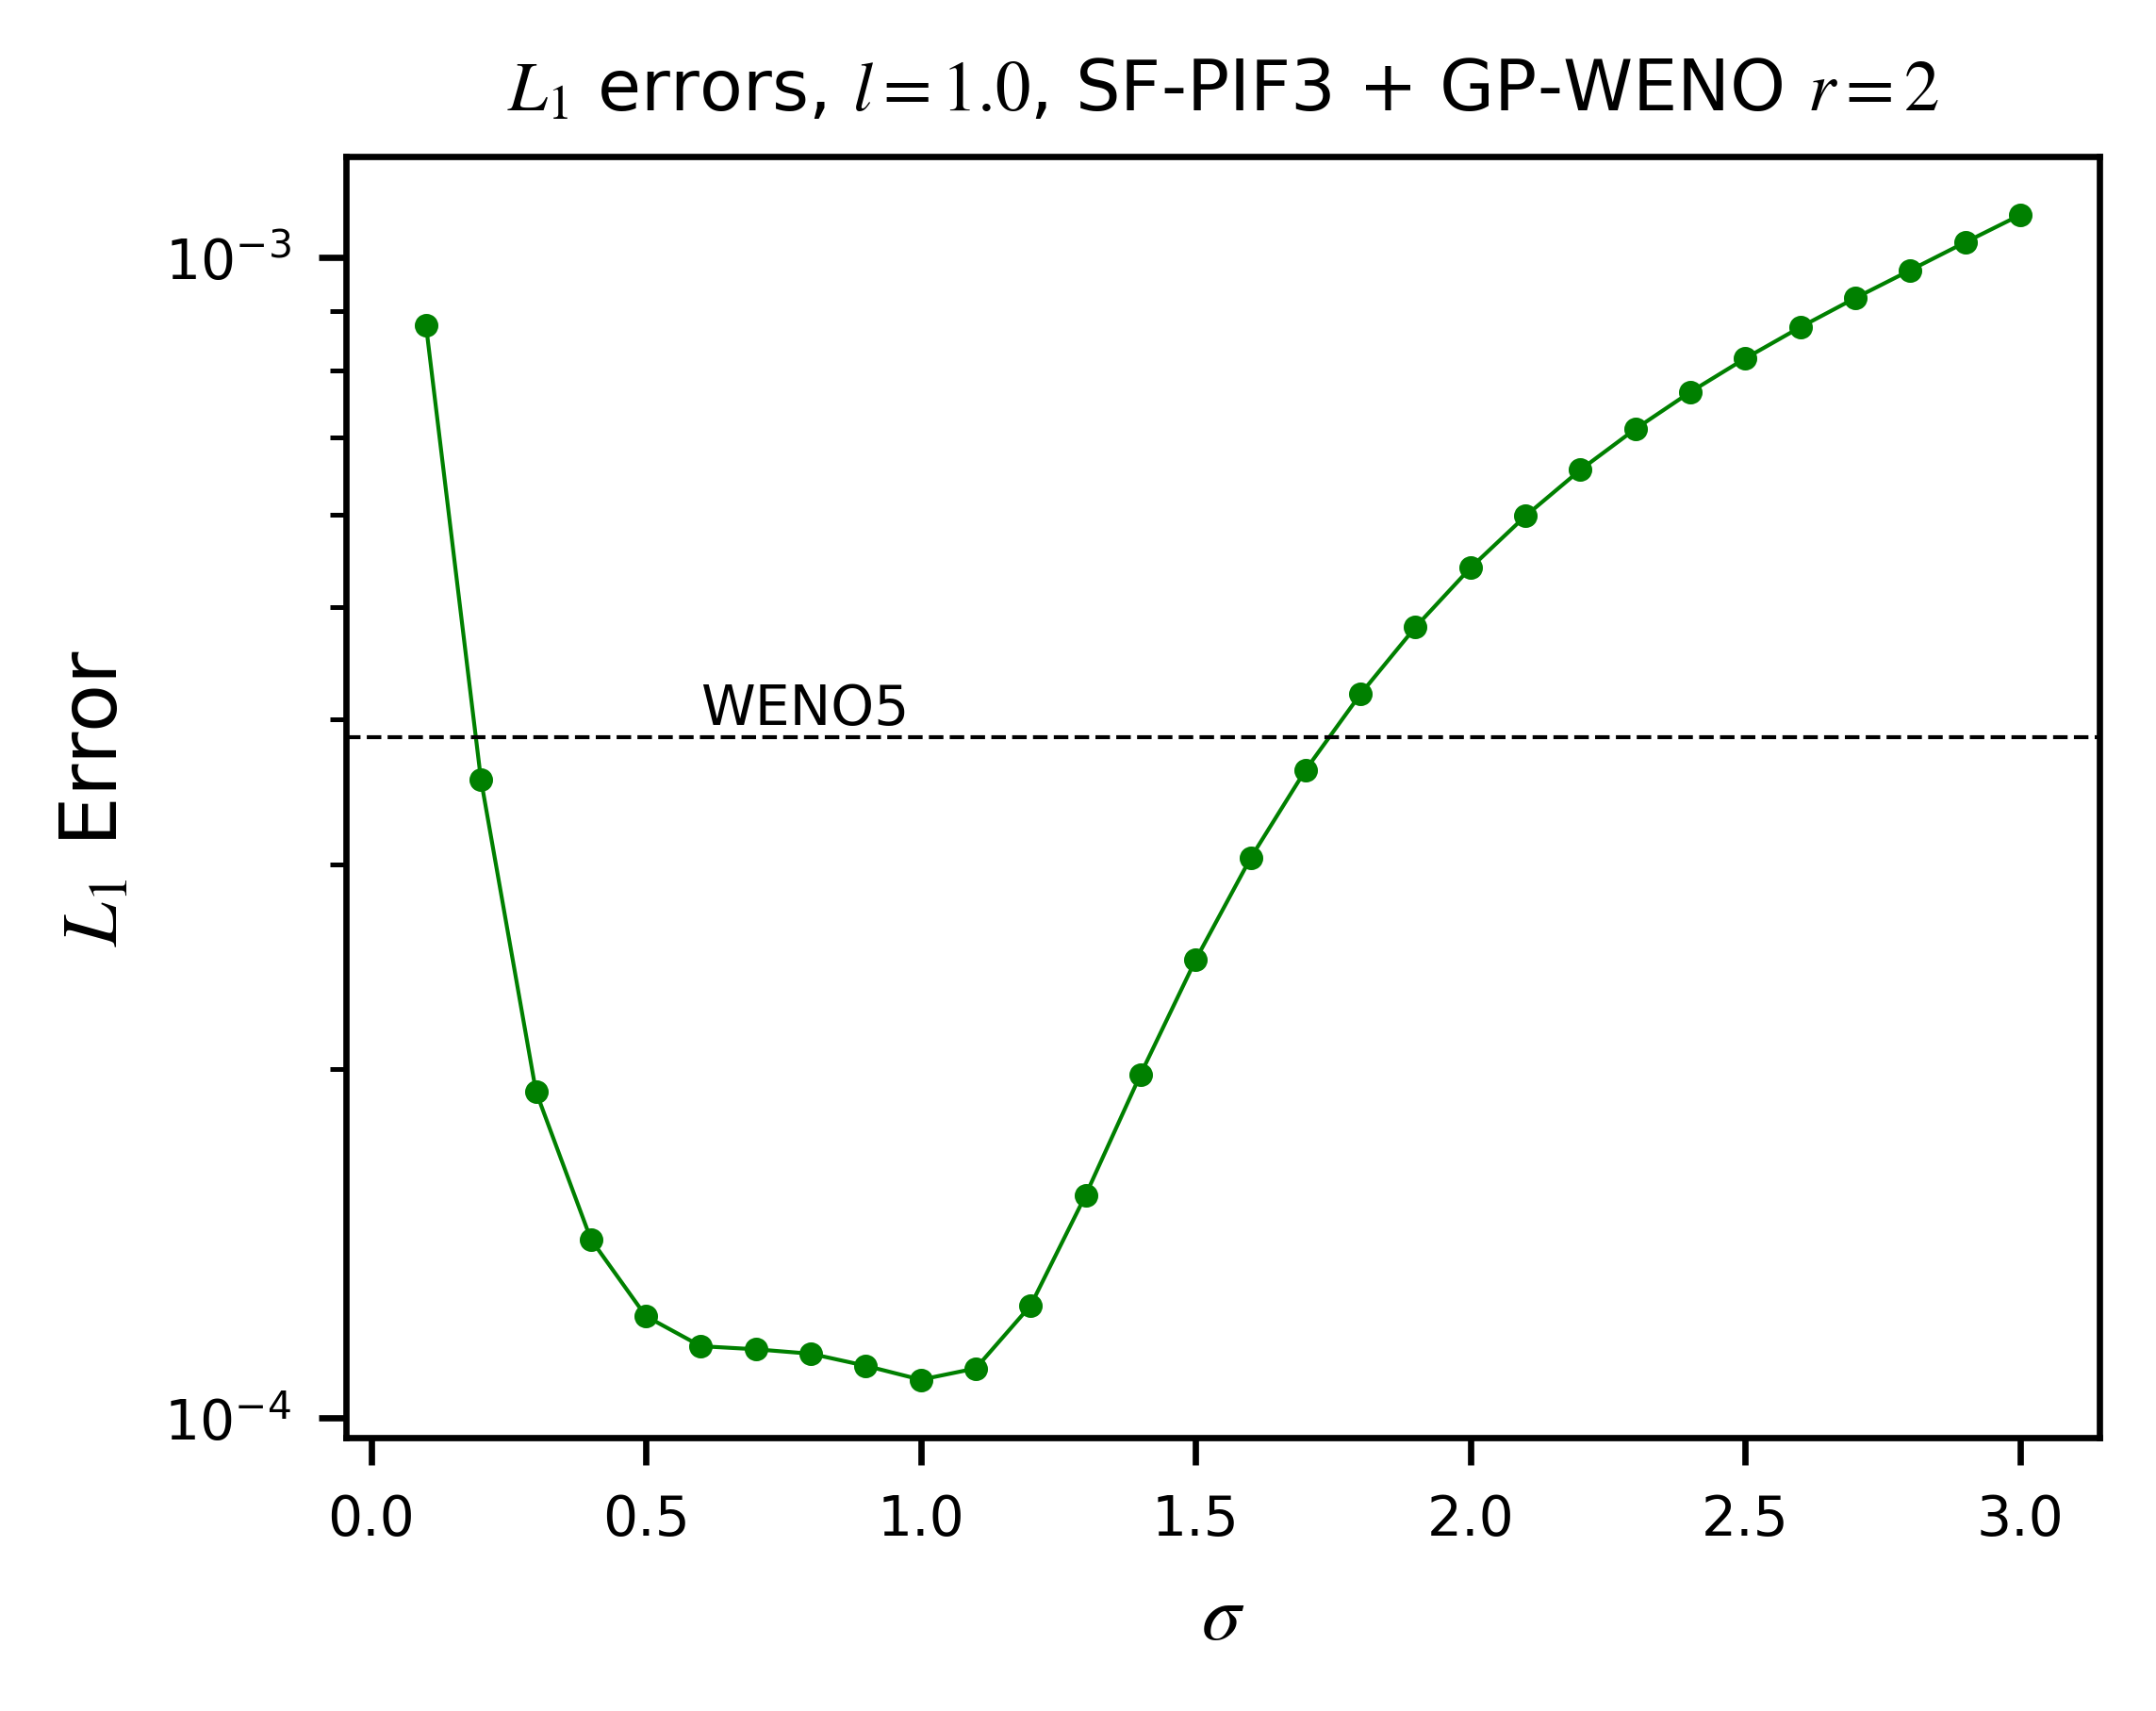

In [11]:
data = sf3

fig = plt.figure(figsize=(4,3), dpi=600)
ax = fig.add_subplot(1,1,1)

# picking up the best ell
lmin = data.df.min(axis=1).idxmin()
lmin = 1.0

# plot L1 errors wrt the sigma
minvals = data.df.loc[lmin]
ax.plot(data.sigma, minvals, 'g.-', markersize=4, linewidth=0.5, label='RK3')

target_error = 3.86E-4
ax.axhline(target_error, color='k', linestyle='--', linewidth=0.5)
ax.annotate('WENO5', xy=(.6, target_error+0.1E-4), fontsize=7)

# logscale
ax.set_yscale('log')
ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('$L_{{1}}$ errors, $l={}$, SF-PIF3 + GP-WENO $r=2$'.format(lmin), fontsize=9)

ax.set_xlabel('$\sigma$')
ax.set_ylabel(r'$L_1$' + ' Error')

fig.savefig('./hp_best_ell_gp2_sf3.pdf', bbox_inches='tight', pad_inches=0)

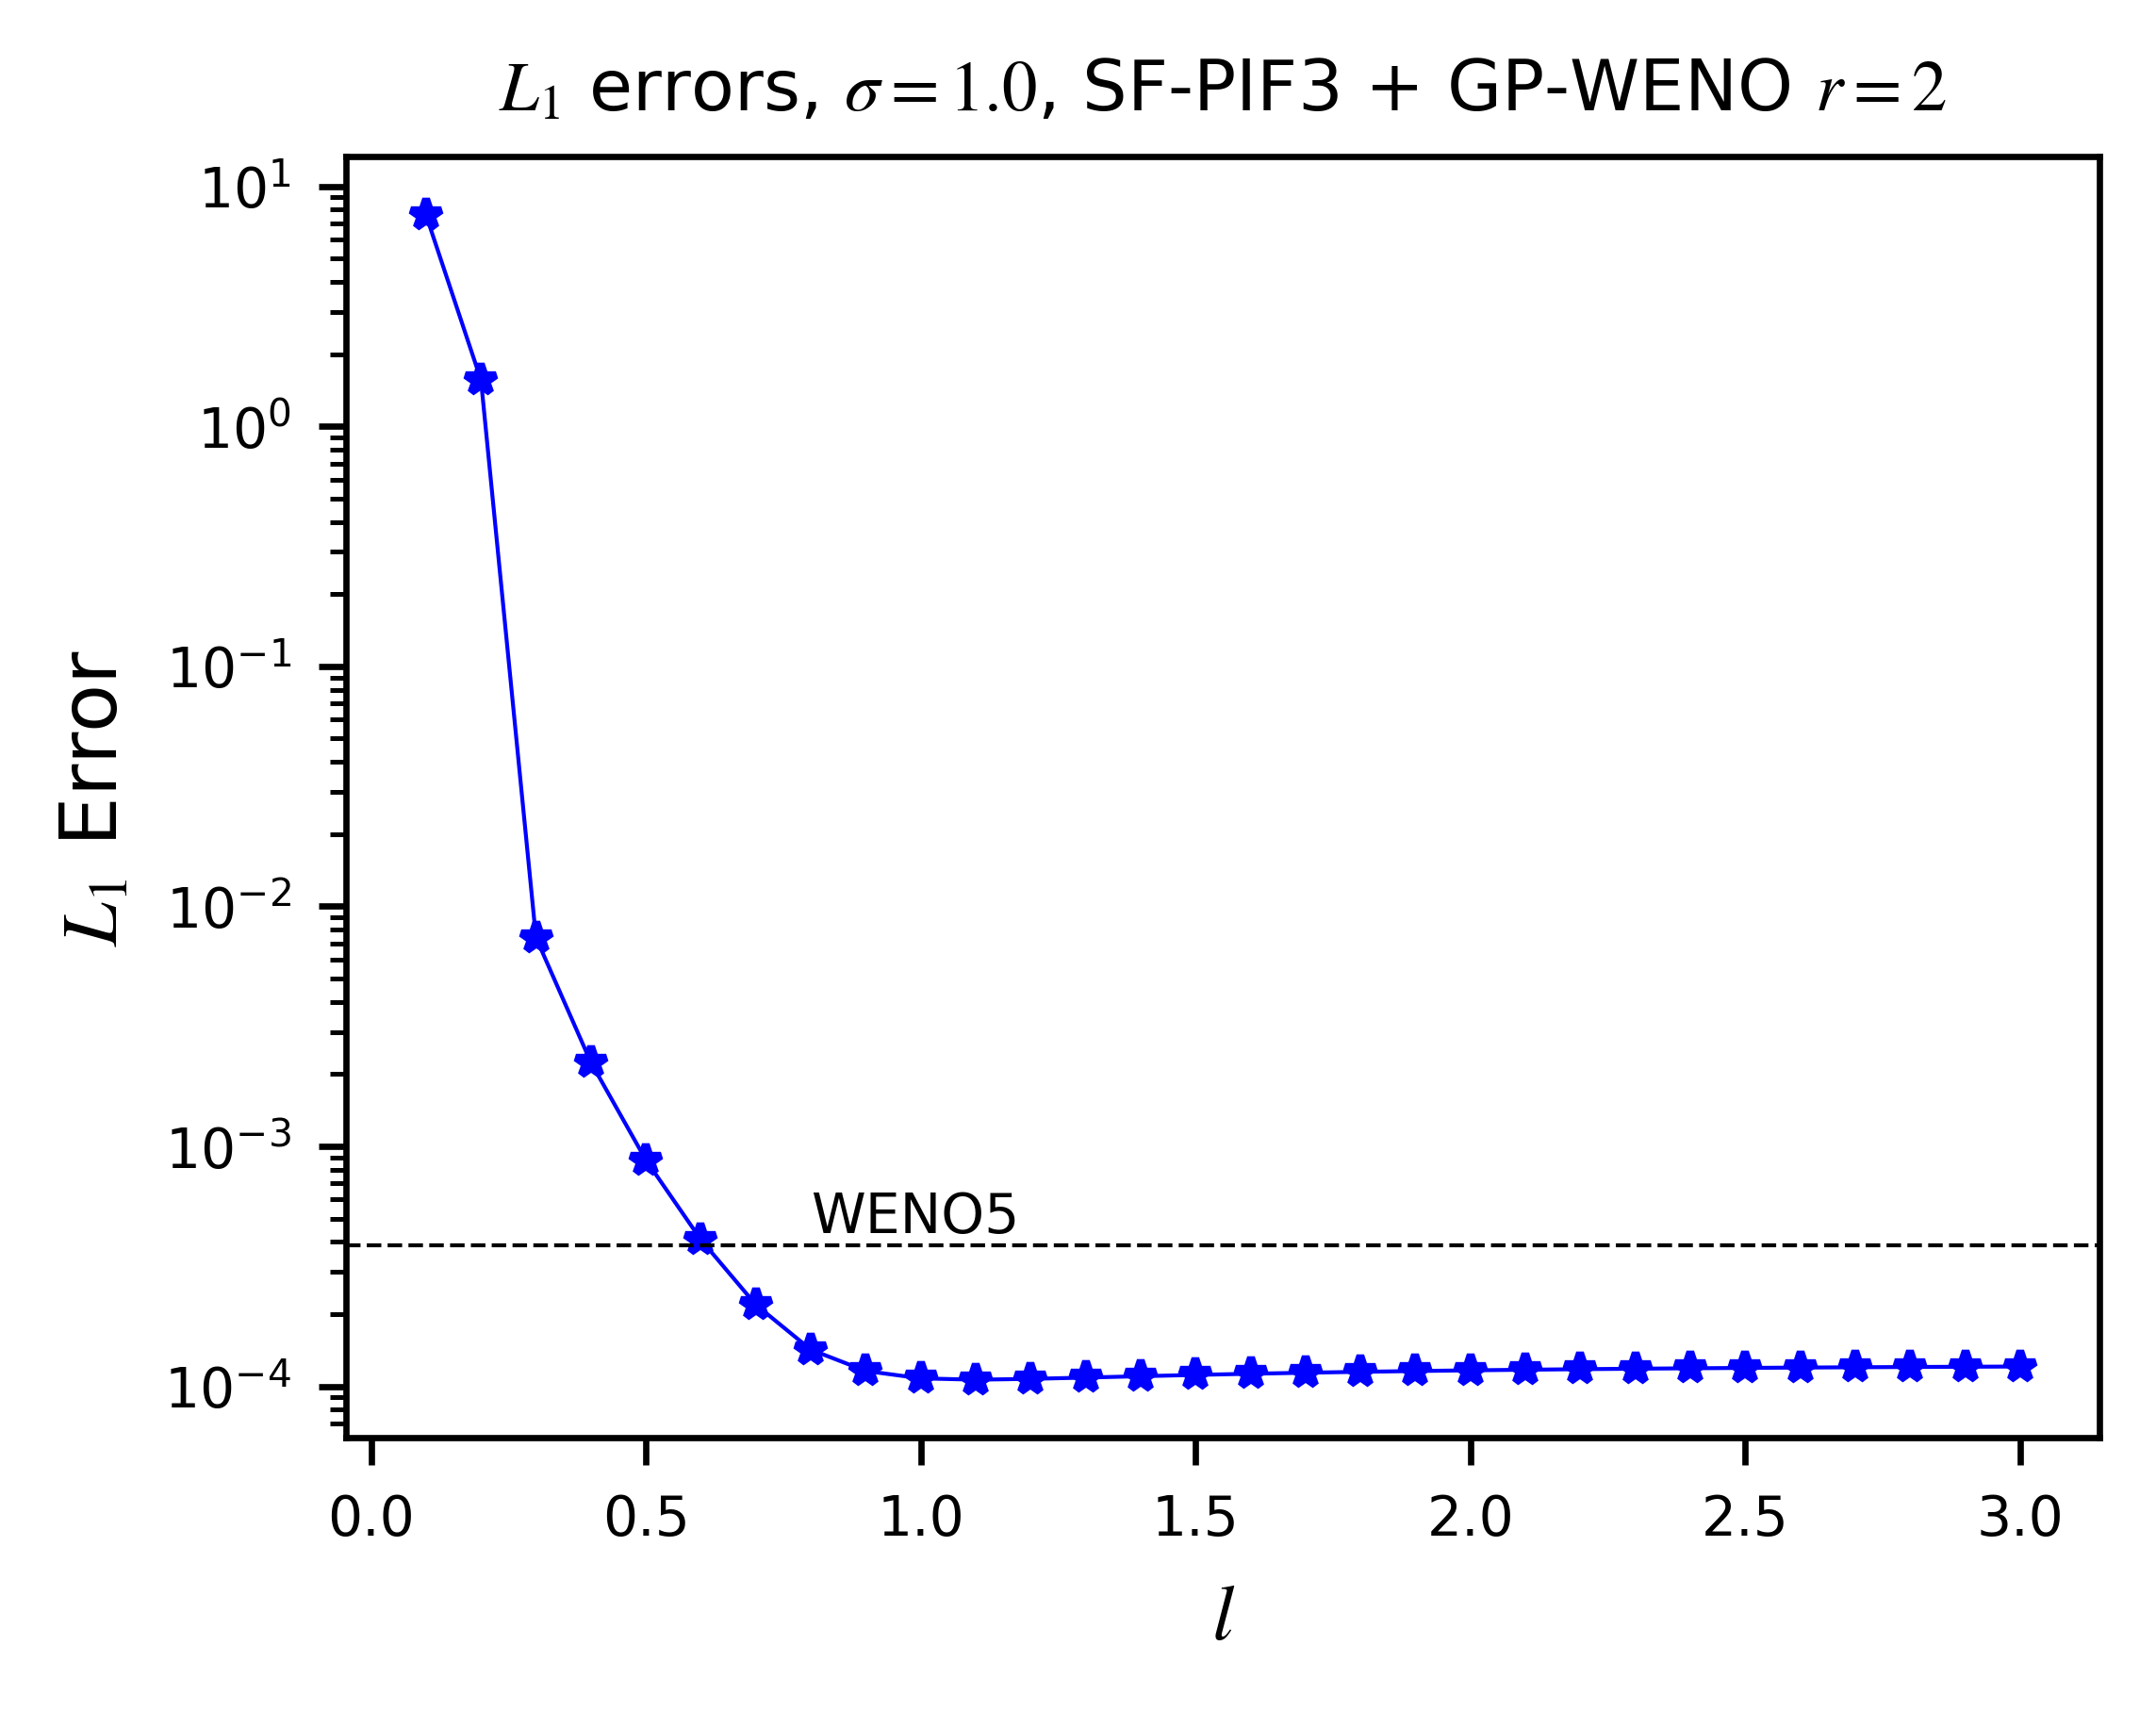

In [12]:
data = sf3

fig = plt.figure(figsize=(4,3), dpi=600)
ax = fig.add_subplot(1,1,1)

# picking up the best sigma
smin = data.df.min(axis=0).idxmin()

# plot L1 errors wrt the ell
minvals = data.df[smin]
ax.plot(data.ell, minvals, 'b*-', markersize=4, linewidth=0.5, label='RK3')

target_error = 3.86E-4
ax.axhline(target_error, color='k', linestyle='--', linewidth=0.5)
ax.annotate('WENO5', xy=(.8, target_error+0.5E-4), fontsize=7)

# logscale
ax.set_yscale('log')
ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('$L_{{1}}$ errors, $\sigma={}$, SF-PIF3 + GP-WENO $r=2$'.format(smin), fontsize=9)

ax.set_xlabel('$l$')
ax.set_ylabel(r'$L_1$' + ' Error')

fig.savefig('./hp_best_sig_gp2_sf3.pdf', bbox_inches='tight', pad_inches=0)

In [7]:
print("minimum error ({}) at l = {}, \sigma = {}".format(sf3.vals.min(), sf3.df.min(axis=1).idxmin(), sf3.df.min(axis=0).idxmin()) )

minimum error (0.00010655596593408424) at l = 1.1, \sigma = 1.0


# SF-PIF4

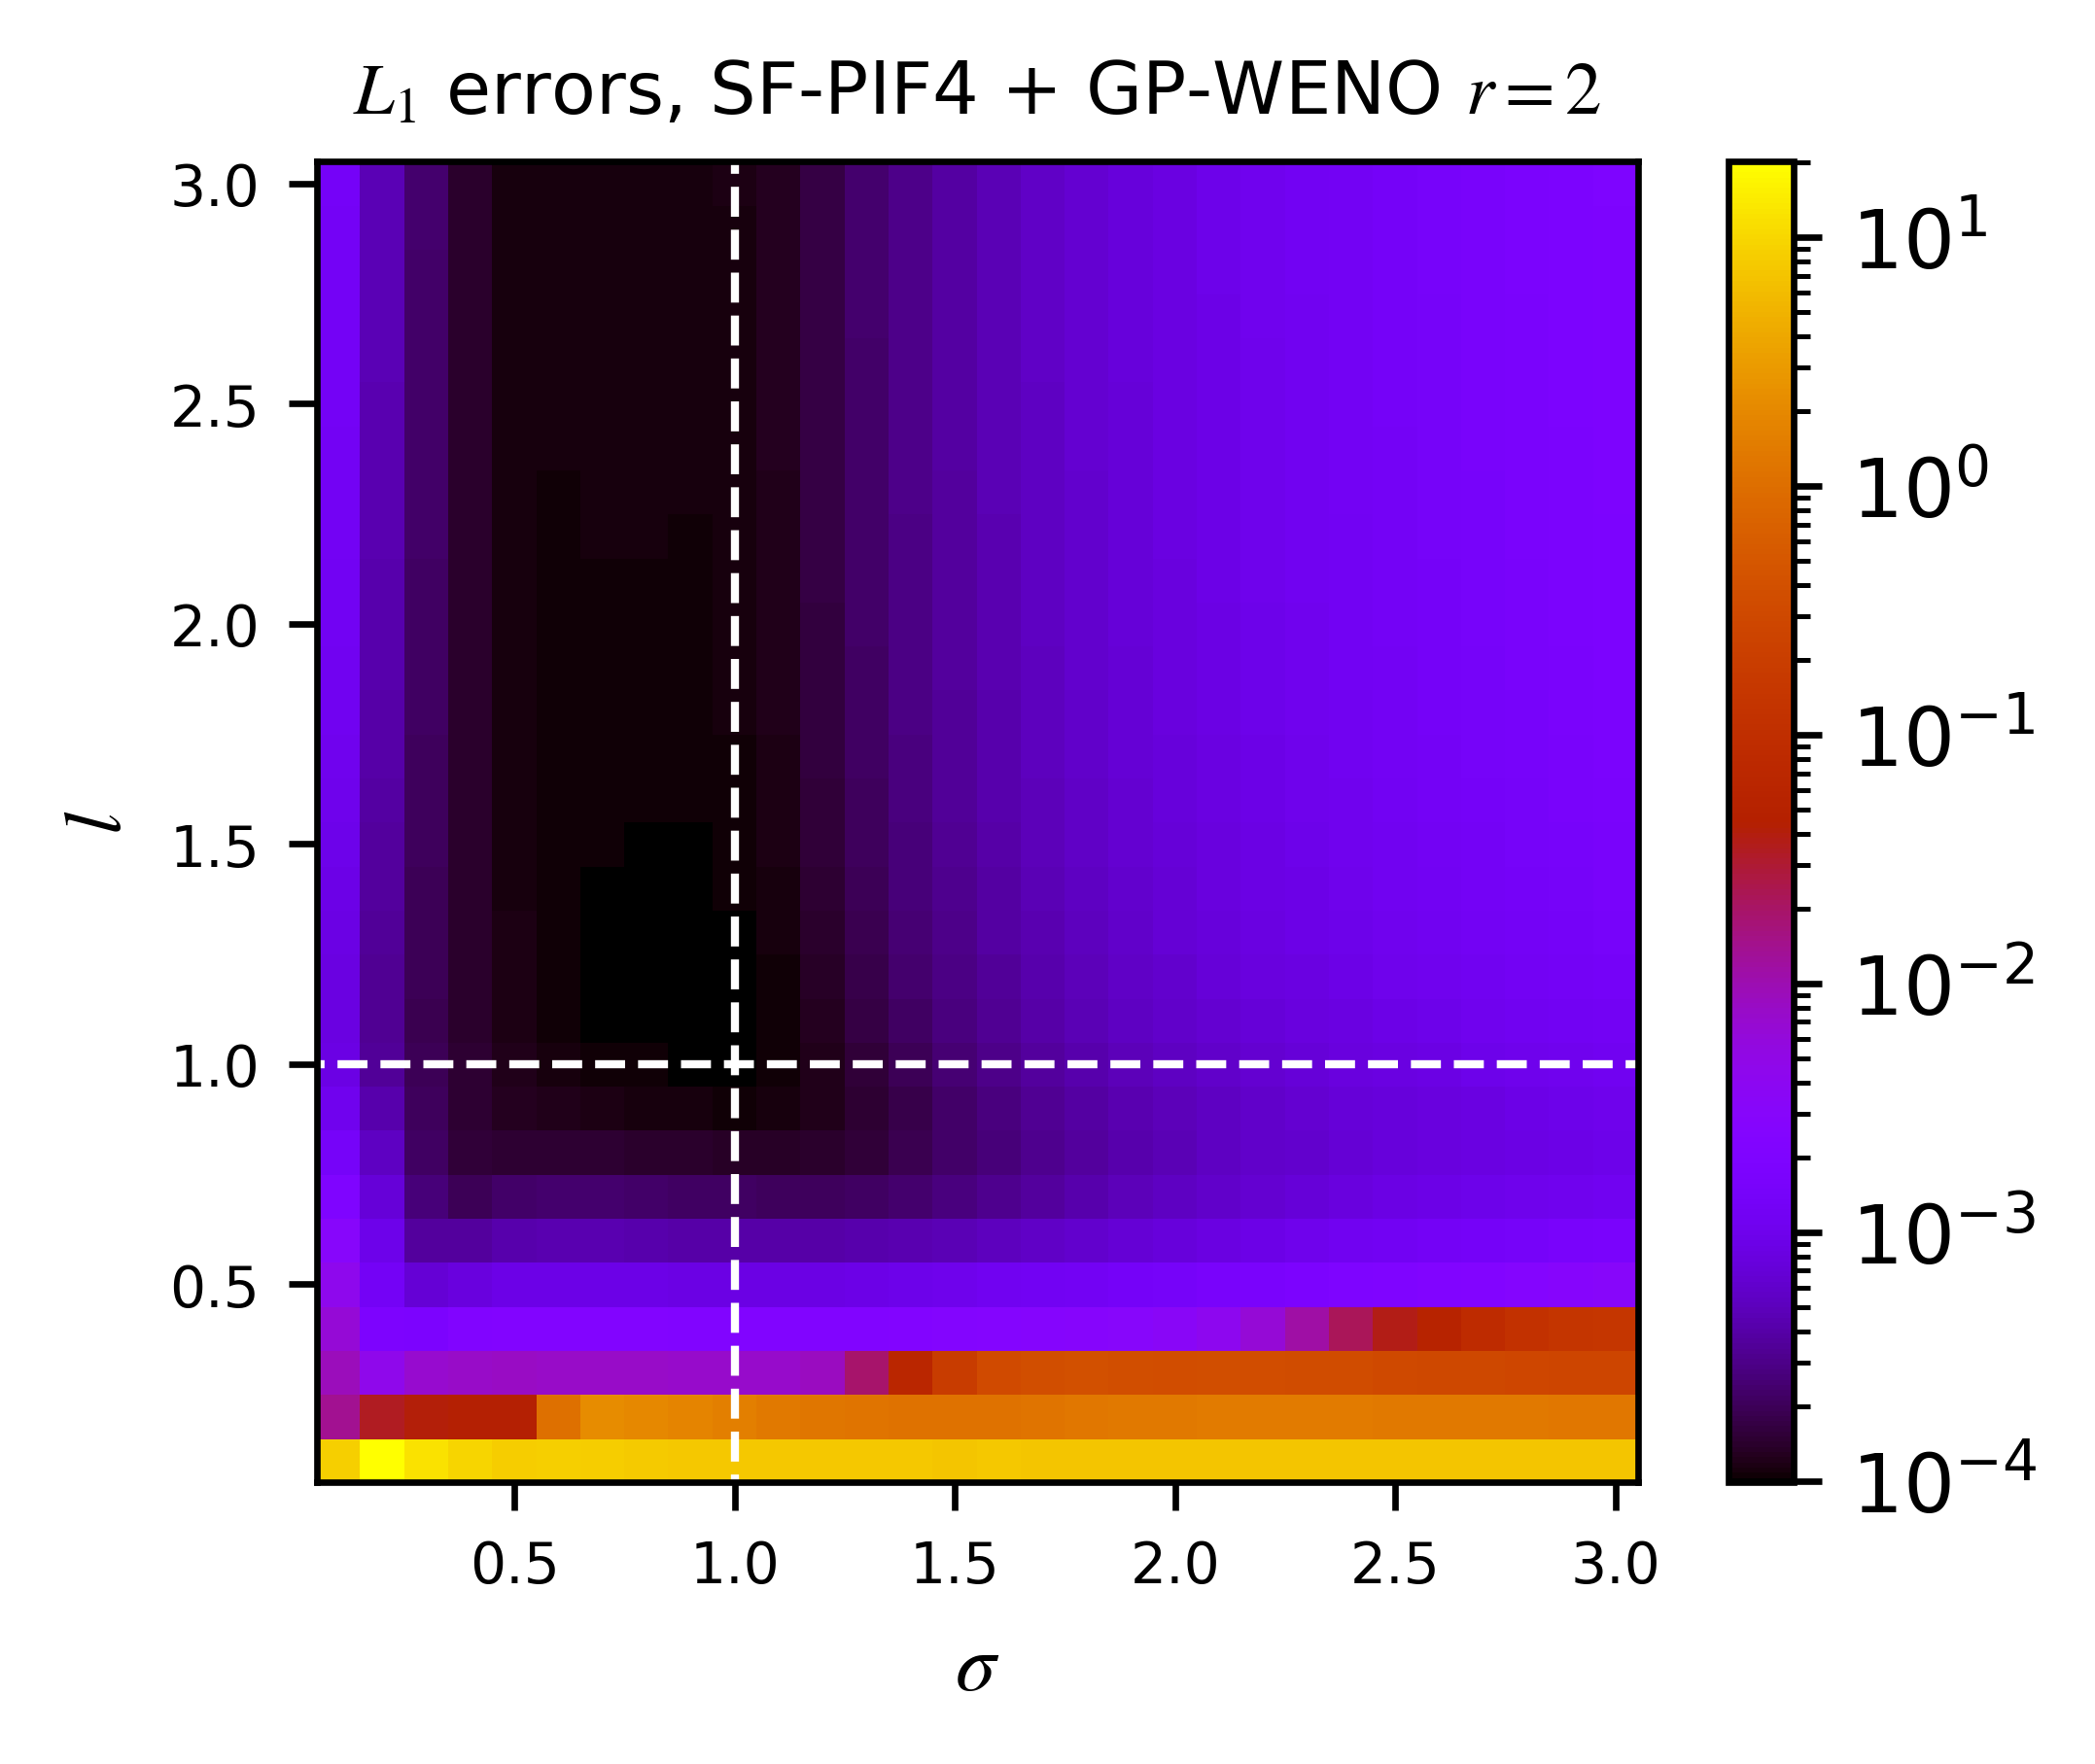

In [13]:
data = sf4

fig = plt.figure(figsize=(4,3), dpi=600)
ax = fig.add_subplot(1,1,1)

ll, ss = data.edge_grid()

im = ax.pcolormesh(ss, ll, data.vals, cmap='gnuplot', norm=LogNorm(data.vals.min(), data.vals.max()))


ax.set_aspect(aspect=1)
ax.set_xlim(0.05, 3.05)
ax.set_ylim(0.05, 3.05)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$l$')


ax.tick_params(axis='both', which='major', labelsize=7)

# ax.set_xticks(data.sigma)
# ax.set_yticks(data.ell)

ax.set_title('$L_{1}$ errors, SF-PIF4 + GP-WENO $r=2$', fontsize=9)

ax.hlines(1.0, 0.0, 3.1, linestyle='--', color='w', linewidth=1)
ax.vlines(1.0, 0.0, 3.1, linestyle='--', color='w', linewidth=1)



cb = plt.colorbar(im)

# fig.savefig('./hp_cmap_gp2_sf4.png', bbox_inches='tight', pad_inches=0)

In [9]:
print("minimum error ({}) at l = {}, \sigma = {}".format(sf4.vals.min(), sf4.df.min(axis=1).idxmin(), sf4.df.min(axis=0).idxmin()) )

minimum error (9.864165446063584e-05) at l = 1.1, \sigma = 0.9


# RK3

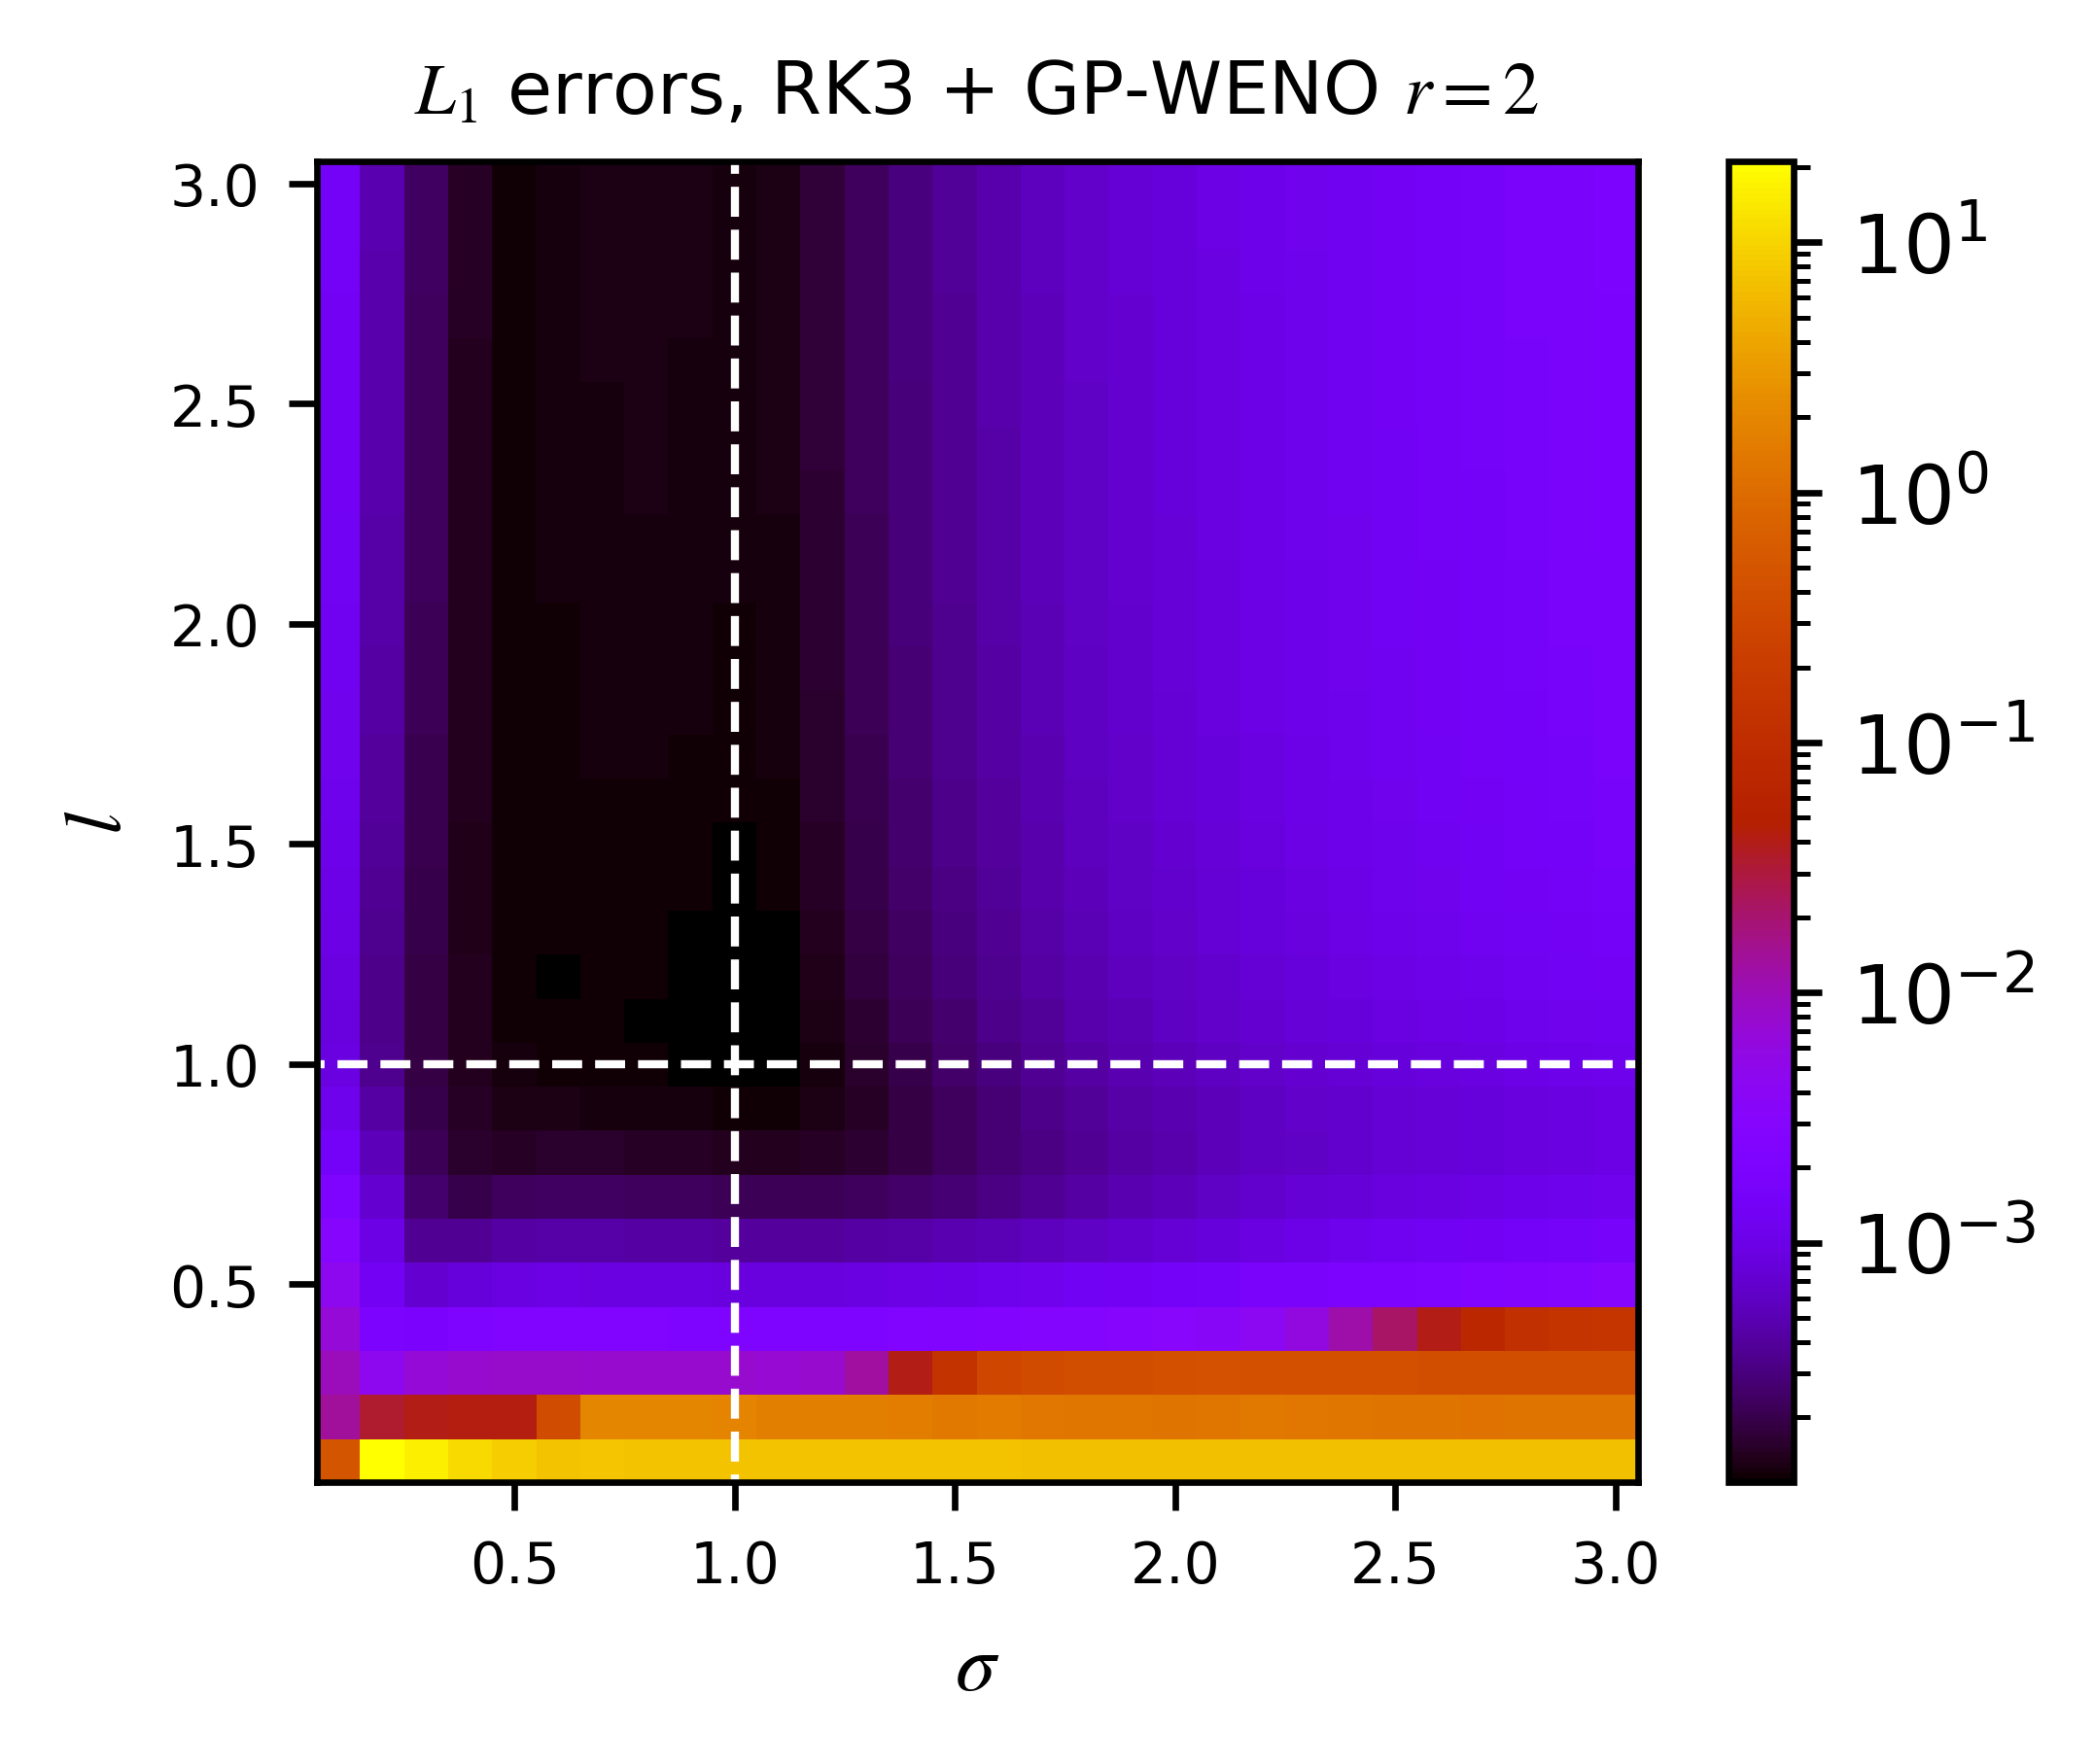

In [14]:
data = rk3

fig = plt.figure(figsize=(4,3), dpi=600)
ax = fig.add_subplot(1,1,1)

ll, ss = data.edge_grid()

im = ax.pcolormesh(ss, ll, data.vals, cmap='gnuplot', norm=LogNorm(data.vals.min(), data.vals.max()))


ax.set_aspect(aspect=1)
ax.set_xlim(0.05, 3.05)
ax.set_ylim(0.05, 3.05)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$l$')


ax.tick_params(axis='both', which='major', labelsize=7)

# ax.set_xticks(data.sigma)
# ax.set_yticks(data.ell)

ax.set_title('$L_{1}$ errors, RK3 + GP-WENO $r=2$', fontsize=9)

ax.hlines(1.0, 0.0, 3.1, linestyle='--', color='w', linewidth=1)
ax.vlines(1.0, 0.0, 3.1, linestyle='--', color='w', linewidth=1)



cb = plt.colorbar(im)

# fig.savefig('./hp_cmap_gp2_rk3.png', bbox_inches='tight', pad_inches=0)

In [15]:
print("minimum error ({}) at l = {}, \sigma = {}".format(rk3.vals.min(), rk3.df.min(axis=1).idxmin(), rk3.df.min(axis=0).idxmin()) )

minimum error (0.0001099010599283347) at l = 1.1, \sigma = 1.0
